### NOTE

- This implementation uses **iteration until convergence** rather than a fixed iteration count.
- The stopping condition is based on the change in the cost function being below a defined threshold (`tolerance = 1e-6`).
- A safeguard (`max_iterations = 10000`) is included to prevent infinite loops in case of slow convergence.
- The final model parameters (θ₀ and θ₁) are determined dynamically based on gradient updates.
- The cost function convergence is visualized to ensure the optimization is working as expected.

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# Load dataset
df = pd.read_csv("../../../data/train/train.csv")

In [19]:
print(df)

   ID  Age  CreditScore Education RiskLevel
0   1   35          720        16       Low
1   2   28          650        14      High
2   3   45          750   missing       Low
3   4   31          600        12      High
4   5   52          780        18       Low
5   6   29          630        14      High
6   7   42          710        16       Low
7   8   33          640        12      High


In [ ]:
# Extract Age and CreditScore columns
X = df["Age"].values
y = df["CreditScore"].values
m = len(y)

# Normalize Age
X = (X - np.mean(X)) / np.std(X)

# Add intercept term
X = np.c_[np.ones(m), X]

# Initialize parameters
theta = np.array([500.0, 5.0])
alpha = 0.01
tolerance = 1e-6  # Convergence threshold
max_iterations = 10000  # Just a safeguard
cost_history = []

# Cost function
def compute_cost(X, y, theta):
    predictions = X @ theta
    errors = predictions - y
    return (1 / (2 * m)) * np.sum(errors ** 2)

# Batch Gradient Descent with Convergence Check
prev_cost = float("inf")
for i in range(max_iterations):
    gradients = (1 / m) * X.T @ (X @ theta - y)
    theta -= alpha * gradients
    cost = compute_cost(X, y, theta)
    cost_history.append(cost)
    
    # Check convergence
    if abs(prev_cost - cost) < tolerance:
        print(f"Converged after {i+1} iterations.")
        break
    prev_cost = cost

print(f"Final theta_0: {theta[0]:.4f}, Final theta_1: {theta[1]:.4f}")

Converged after 982 iterations.
Final theta_0: 684.9904, Final theta_1: 53.6751


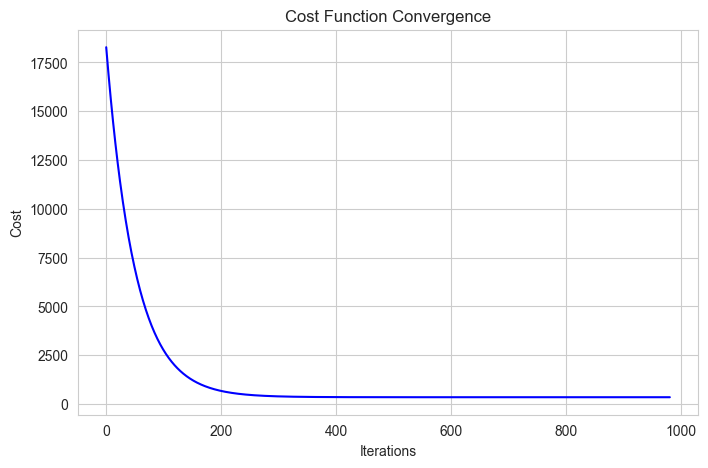

In [21]:
# Plot cost function convergence
plt.figure(figsize=(8, 5))
plt.plot(range(len(cost_history)), cost_history, color='blue')
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Convergence")
plt.show()

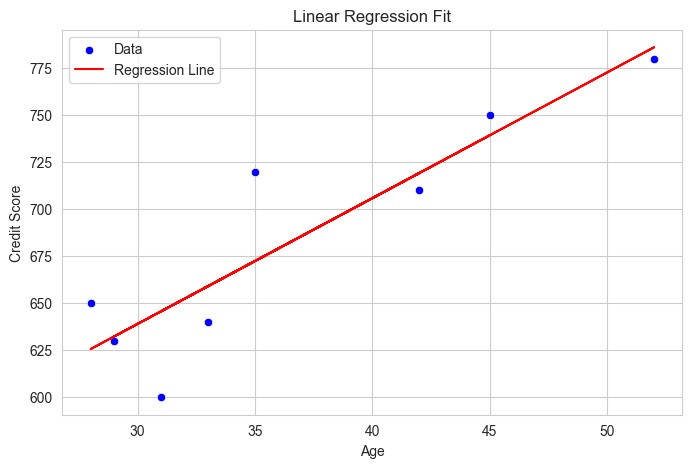

In [22]:
# Plot regression line
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df["Age"], y=df["CreditScore"], label="Data", color="blue")
plt.plot(df["Age"], X @ theta, color="red", label="Regression Line")
plt.xlabel("Age")
plt.ylabel("Credit Score")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()